In [203]:
import pandas as pd
from sklearn.model_selection import train_test_split

df = pd.read_csv('t-shirts.csv')
df.head()

,size,material,color,sleeves,demand
0,S,nylon,white,long,medium
1,XL,polyester,cream,short,high
2,S,silk,blue,short,medium
3,M,cotton,black,short,medium
4,XL,polyester,orange,long,medium


In [204]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   size      20000 non-null  object
 1   material  20000 non-null  object
 2   color     20000 non-null  object
 3   sleeves   20000 non-null  object
 4   demand    20000 non-null  object
dtypes: object(5)
memory usage: 781.4+ KB


In [205]:
df.describe(include=['object'])

,size,material,color,sleeves,demand
count,20000,20000,20000,20000,20000
unique,7,5,10,2,3
top,L,nylon,white,long,high
freq,4408,5652,3286,10117,8965


In [206]:
df.value_counts("size")

size
L      4408
XL     3480
M      3414
XXL    2614
S      2585
XS     1764
3XL    1735
Name: count, dtype: int64

In [207]:
df.value_counts("material")

material
nylon        5652
polyester    5555
cotton       4334
linen        3336
silk         1123
Name: count, dtype: int64

In [208]:
df.value_counts("color")

color
white     3286
black     3118
cream     2298
navy      2289
red       2000
blue      1958
yellow    1401
orange    1320
violet    1295
green     1035
Name: count, dtype: int64

In [209]:
df.value_counts("sleeves")

sleeves
long     10117
short     9883
Name: count, dtype: int64

In [210]:
df.value_counts("demand")

demand
high      8965
medium    8709
low       2326
Name: count, dtype: int64

## Dane porządkowe (mapowanie wartości)

In [211]:
size_mapping = {"XS": 0, "S": 1, "M": 2, "L": 3, "XL": 4, "XXL": 5, "3XL": 6}
sleeves_mapping = {"short": 0, "long": 1}

df['size'] = df['size'].map(size_mapping)
df['sleeves'] = df['sleeves'].map(sleeves_mapping)

df.head()

,size,material,color,sleeves,demand
0,1,nylon,white,1,medium
1,4,polyester,cream,0,high
2,1,silk,blue,0,medium
3,2,cotton,black,0,medium
4,4,polyester,orange,1,medium


## Dane nominalne (kodowanie one-hot)

In [212]:
df = pd.get_dummies(df, columns=["material", "color"])

df.head()

,size,sleeves,demand,material_cotton,material_linen,material_nylon,material_polyester,material_silk,color_black,color_blue,color_cream,color_green,color_navy,color_orange,color_red,color_violet,color_white,color_yellow
0,1,1,medium,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False
1,4,0,high,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False
2,1,0,medium,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False
3,2,0,medium,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False
4,4,1,medium,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False


## Podział na zbiór treningowy i testowy

In [213]:
X = df.drop("demand", axis=1)
y = df["demand"]

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

## Normalizacja danych - przekształca dane tak, aby wszystkie cechy miały wartości w tym samym zakresie (np. od 0 do 1)

In [214]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_val_normalized = scaler.transform(X_val)

## Standaryzacja danych - przekształca dane tak, aby średnia była równa 0, a odchylenie standardowe 1

In [215]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_standardized = scaler.fit_transform(X_train)
X_val_standardized = scaler.transform(X_val)

# Dyskretyzacja danych - przekształca dane ciągłe na dyskretne

In [216]:
from sklearn.preprocessing import KBinsDiscretizer

kbins = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='uniform')
X_train_discretized = kbins.fit_transform(X_train)
X_val_discretized = kbins.transform(X_val)

## Selekcja cech - wybór najważniejszych cech

In [217]:
from sklearn.feature_selection import SelectKBest, chi2

selector = SelectKBest(chi2, k=10)
X_train_selected = selector.fit_transform(X_train, y_train)
X_val_selected = selector.transform(X_val)

## PCA

In [218]:
from sklearn.decomposition import PCA

pca = PCA(n_components=10)
X_train_pca = pca.fit_transform(X_train)
X_val_pca = pca.transform(X_val)

## Klasyfikacja na surowych danych

In [219]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

model = LogisticRegression(max_iter=1000)

model.fit(X_train, y_train)
y_pred = model.predict(X_val)
accuracy_raw = accuracy_score(y_val, y_pred)
precision_score_raw = precision_score(y_val, y_pred, average='macro')
recall_score_raw = recall_score(y_val, y_pred, average='macro')
f1_score_raw = f1_score(y_val, y_pred, average='macro')

## Klasyfikacja na znormalizowanych danych

In [220]:
model.fit(X_train_normalized, y_train)
y_pred_normalized = model.predict(X_val_normalized)
accuracy_normalized = accuracy_score(y_val, y_pred_normalized)
precision_score_normalized = precision_score(y_val, y_pred_normalized, average='macro')
recall_score_normalized = recall_score(y_val, y_pred_normalized, average='macro')
f1_score_normalized = f1_score(y_val, y_pred_normalized, average='macro')

## Klasyfikacja na standaryzowanych danych

In [221]:
model.fit(X_train_standardized, y_train)
y_pred_standardized = model.predict(X_val_standardized)
accuracy_standardized = accuracy_score(y_val, y_pred_standardized)
precision_score_standardized = precision_score(y_val, y_pred_standardized, average='macro')
recall_score_standardized = recall_score(y_val, y_pred_standardized, average='macro')
f1_score_standardized = f1_score(y_val, y_pred_standardized, average='macro')

## Klasyfikacja na zdykretyzowanych danych

In [222]:
model.fit(X_train_discretized, y_train)
y_pred_discretized = model.predict(X_val_discretized)
accuracy_discretized = accuracy_score(y_val, y_pred_discretized)
precision_score_discretized = precision_score(y_val, y_pred_discretized, average='macro')
recall_score_discretized = recall_score(y_val, y_pred_discretized, average='macro')
f1_score_discretized = f1_score(y_val, y_pred_discretized, average='macro')

## Klasyfikacja na wybranych cechach

In [223]:
model.fit(X_train_selected, y_train)
y_pred_selected = model.predict(X_val_selected)
accuracy_selected = accuracy_score(y_val, y_pred_selected)
precision_score_selected = precision_score(y_val, y_pred_selected, average='macro')
recall_score_selected = recall_score(y_val, y_pred_selected, average='macro')
f1_score_selected = f1_score(y_val, y_pred_selected, average='macro')

## Klasyfikacja na danych zredukowanych za pomocą PCA

In [224]:
model.fit(X_train_pca, y_train)
y_pred_pca = model.predict(X_val_pca)
accuracy_pca = accuracy_score(y_val, y_pred_pca)
precision_score_pca = precision_score(y_val, y_pred_pca, average='macro')
recall_score_pca = recall_score(y_val, y_pred_pca, average='macro')
f1_score_pca = f1_score(y_val, y_pred_pca, average='macro')

## Porównanie wyników

In [225]:
results = {
    'Raw': {'Accuracy': accuracy_raw, 'Precision': precision_score_raw, 'Recall': recall_score_raw, 'F1-score': f1_score_raw},
    'Normalized': {'Accuracy': accuracy_normalized, 'Precision': precision_score_normalized, 'Recall': recall_score_normalized, 'F1-score': f1_score_normalized},
    'Standardized': {'Accuracy': accuracy_standardized, 'Precision': precision_score_standardized, 'Recall': recall_score_standardized, 'F1-score': f1_score_standardized},
    'Discretized': {'Accuracy': accuracy_discretized, 'Precision': precision_score_discretized, 'Recall': recall_score_discretized, 'F1-score': f1_score_discretized},
    'Selected': {'Accuracy': accuracy_selected, 'Precision': precision_score_selected, 'Recall': recall_score_selected, 'F1-score': f1_score_selected},
    'PCA': {'Accuracy': accuracy_pca, 'Precision': precision_score_pca, 'Recall': recall_score_pca, 'F1-score': f1_score_pca}
}

results_df = pd.DataFrame(results)
print(results_df)


                Raw  Normalized  Standardized  Discretized  Selected       PCA
Accuracy   0.848500    0.846250      0.848500     0.855750  0.852250  0.787250
Precision  0.835409    0.835323      0.835409     0.852884  0.834508  0.748941
Recall     0.799907    0.799810      0.799907     0.807017  0.804343  0.645035
F1-score   0.815061    0.815011      0.815061     0.825931  0.817495  0.656640


## Klasyfikatory 3-4 punkty

In [226]:
## Naive Bayes and Decision Tree

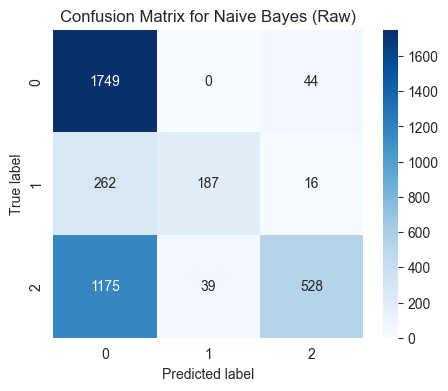

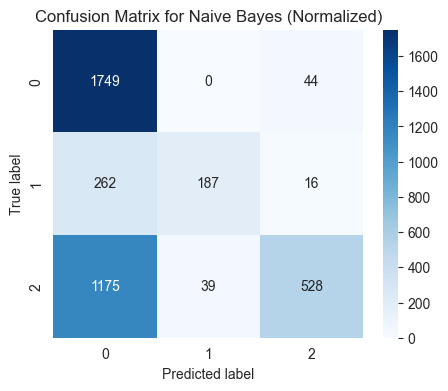

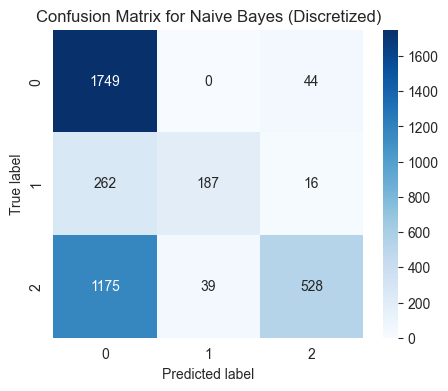

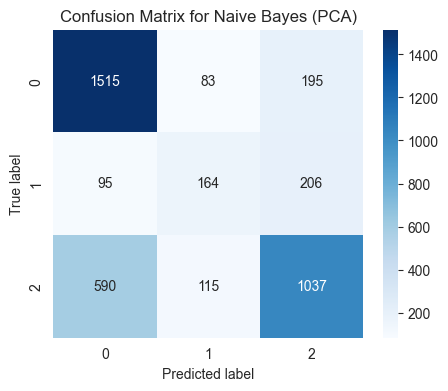

         Model       Method  Accuracy    Recall  Precision  F1-score
0  Naive Bayes          Raw     0.616  0.560237   0.758119  0.565671
1  Naive Bayes   Normalized     0.616  0.560237   0.758119  0.565671
2  Naive Bayes  Discretized     0.616  0.560237   0.758119  0.565671
3  Naive Bayes          PCA     0.679  0.597645   0.620939  0.602548


In [227]:
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

data_sets = {
    'Raw': (X_train, X_val),
    'Normalized': (X_train_normalized, X_val_normalized),
    'Discretized': (X_train_discretized, X_val_discretized),
    'PCA': (X_train_pca, X_val_pca)
}

results = []

nb = GaussianNB()
for name, (X_train_set, X_val_set) in data_sets.items():
    nb.fit(X_train_set, y_train)
    y_pred_nb = nb.predict(X_val_set)
    accuracy_nb = accuracy_score(y_val, y_pred_nb)
    recall_nb = recall_score(y_val, y_pred_nb, average='macro')
    precision_nb = precision_score(y_val, y_pred_nb, average='macro')
    f1_nb = f1_score(y_val, y_pred_nb, average='macro')
    results.append({'Model': 'Naive Bayes', 'Method': name, 'Accuracy': accuracy_nb, 'Recall': recall_nb, 'Precision': precision_nb, 'F1-score': f1_nb})
    cm = confusion_matrix(y_val, y_pred_nb)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix for Naive Bayes ({name})')
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.show()

results_df = pd.DataFrame(results)
print(results_df)

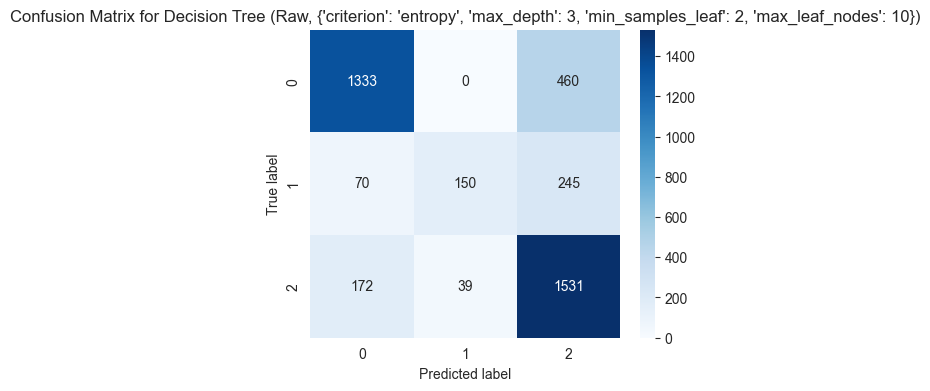

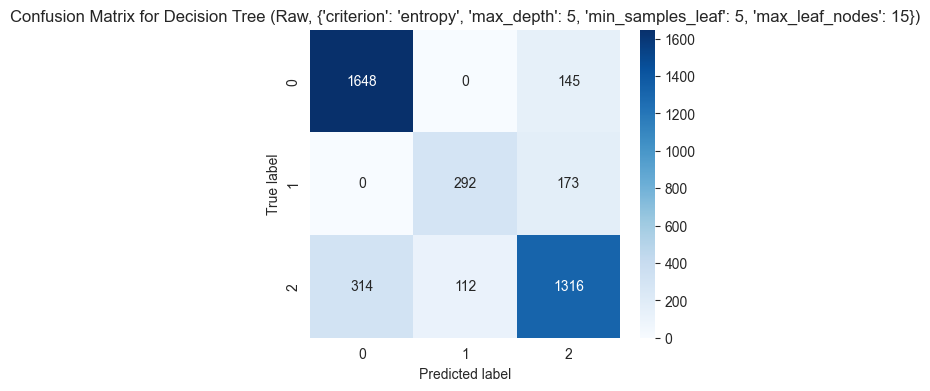

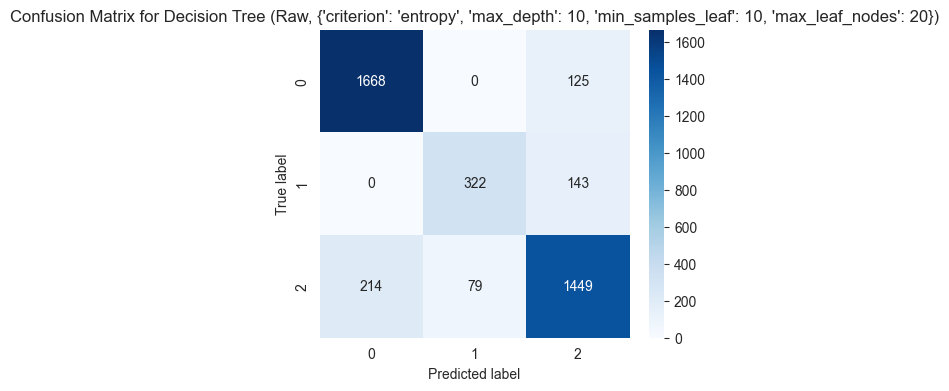

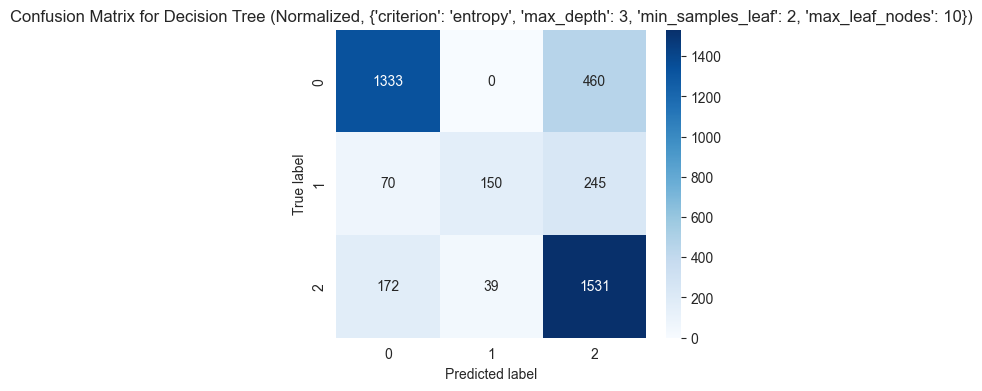

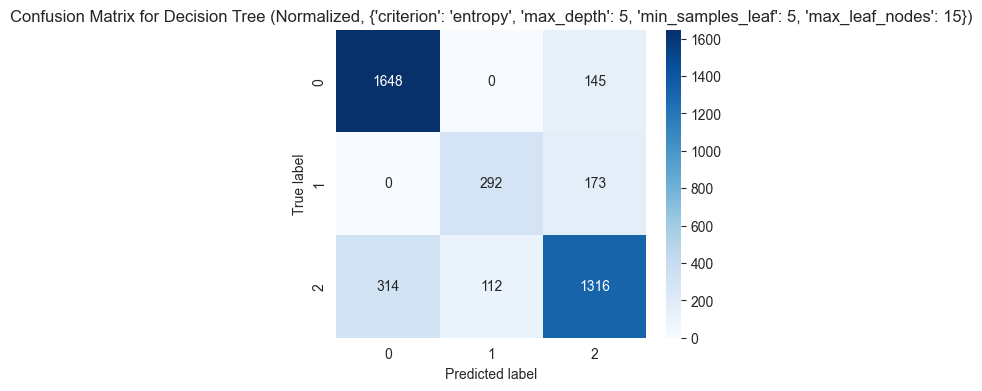

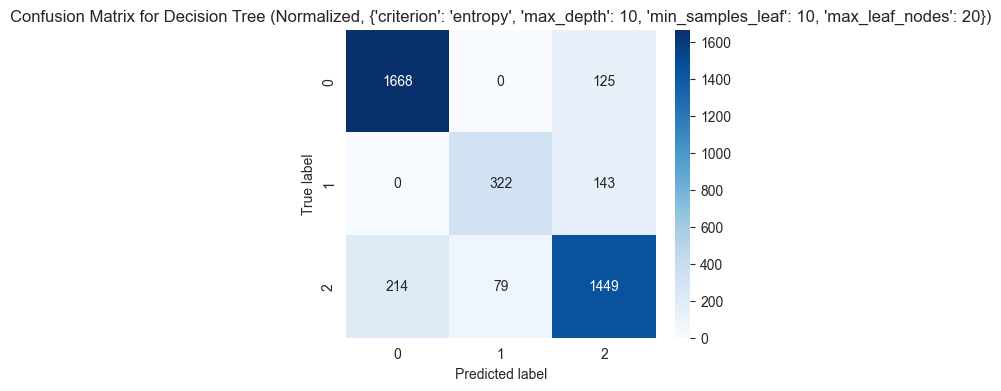

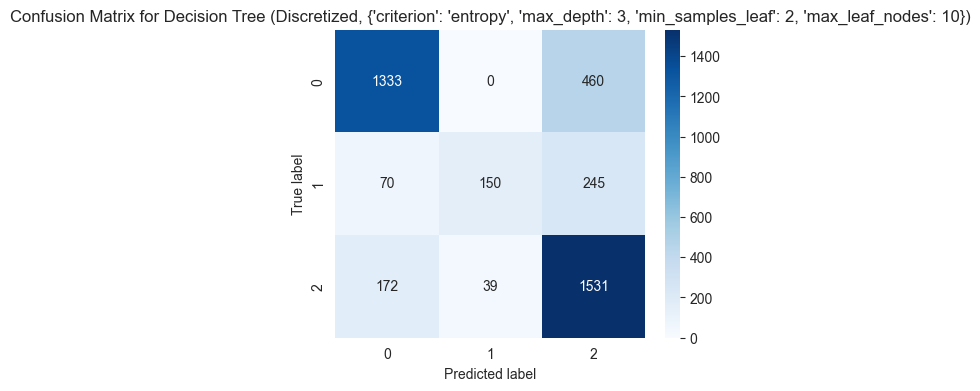

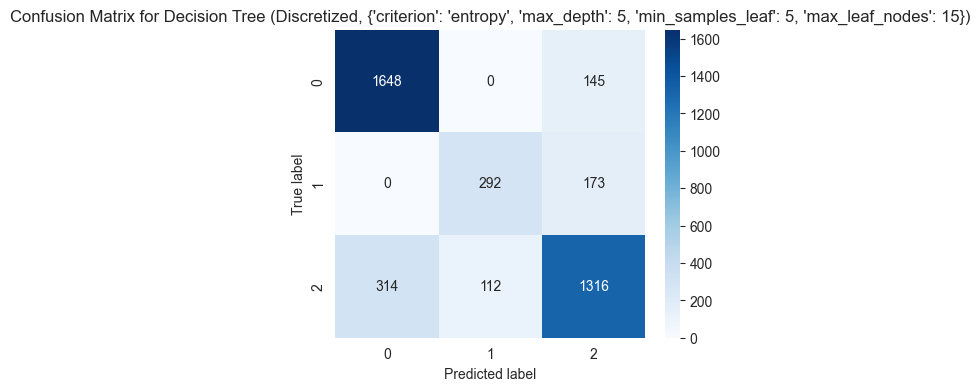

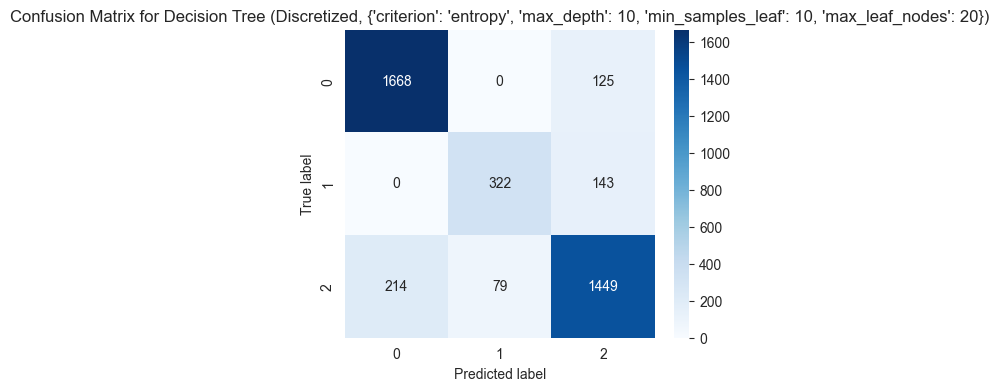

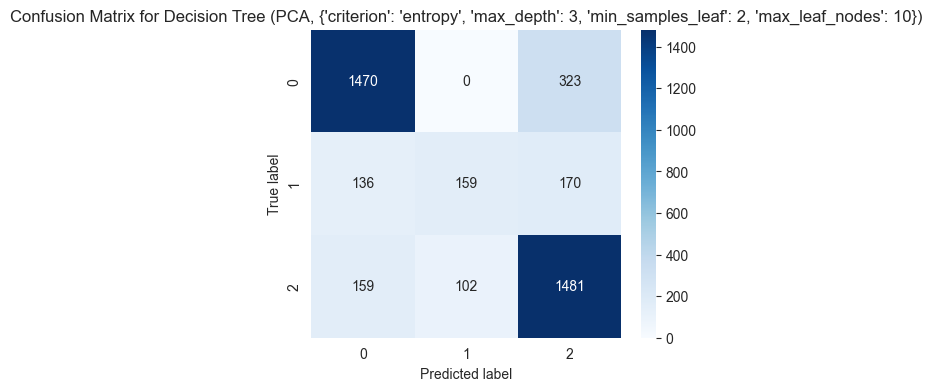

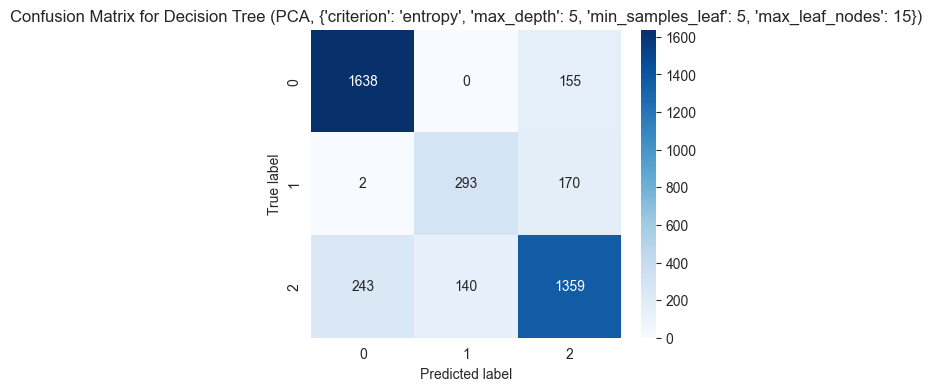

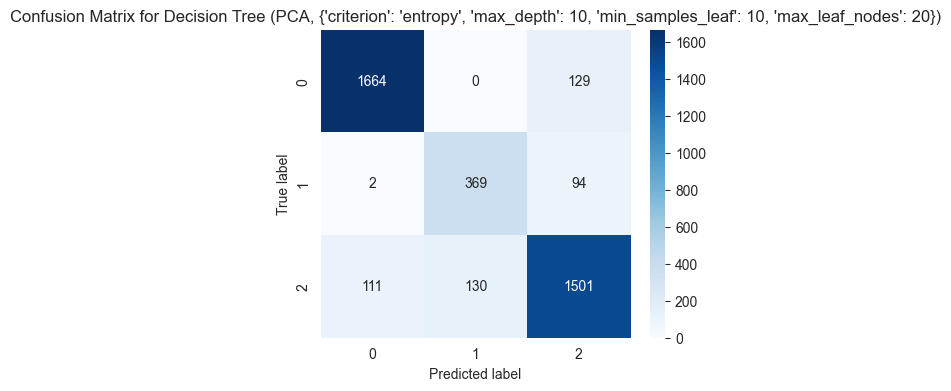

            Model       Method  Accuracy    Recall  Precision  F1-score  \
0     Naive Bayes          Raw   0.61600  0.560237   0.758119  0.565671   
1     Naive Bayes   Normalized   0.61600  0.560237   0.758119  0.565671   
2     Naive Bayes  Discretized   0.61600  0.560237   0.758119  0.565671   
3     Naive Bayes          PCA   0.67900  0.597645   0.620939  0.602548   
4   Decision Tree          Raw   0.75350  0.648301   0.774902  0.673339   
5   Decision Tree          Raw   0.81400  0.767513   0.789372  0.776474   
6   Decision Tree          Raw   0.85975  0.818187   0.844399  0.829739   
7   Decision Tree   Normalized   0.75350  0.648301   0.774902  0.673339   
8   Decision Tree   Normalized   0.81400  0.767513   0.789372  0.776474   
9   Decision Tree   Normalized   0.85975  0.818187   0.844399  0.829739   
10  Decision Tree  Discretized   0.75350  0.648301   0.774902  0.673339   
11  Decision Tree  Discretized   0.81400  0.767513   0.789372  0.776474   
12  Decision Tree  Discre

In [228]:
dt_params = [
    {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 2, 'max_leaf_nodes': 10},
    {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 5, 'max_leaf_nodes': 15},
    {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 10, 'max_leaf_nodes': 20}
]

for name, (X_train_set, X_val_set) in data_sets.items():
    for params in dt_params:
        dt = DecisionTreeClassifier(**params)
        dt.fit(X_train_set, y_train)
        y_pred_dt = dt.predict(X_val_set)
        accuracy_dt = accuracy_score(y_val, y_pred_dt)
        recall_dt = recall_score(y_val, y_pred_dt, average='macro')
        precision_dt = precision_score(y_val, y_pred_dt, average='macro')
        f1_dt = f1_score(y_val, y_pred_dt, average='macro')
        results.append({'Model': 'Decision Tree', 'Method': name, 'Params': str(params), 'Accuracy': accuracy_dt, 'Recall': recall_dt, 'Precision': precision_dt, 'F1-score': f1_dt})
        cm = confusion_matrix(y_val, y_pred_dt)
        plt.figure(figsize=(5,4))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
        plt.title(f'Confusion Matrix for Decision Tree ({name}, {params})')
        plt.xlabel('Predicted label')
        plt.ylabel('True label')
        plt.show()

# Konwersja wyników do DataFrame i wyświetlenie
results_df = pd.DataFrame(results)
print(results_df)